In [1]:
import unicodedata
import re
import json
import os
from requests import get
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import numpy as np


In [2]:
df=pd.read_json('data.json')

In [3]:
df

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,# Bayesian inference and forecast of COVID-19\...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,# COVID-19_TRACKER_HTML_CSS_JAVASCRIPT\nCOVID-...
2,joanby/covid19,HTML,
3,sambreen27/covid19,JavaScript,A simple ReactJS app that displays latest stat...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,# ⚠ This Code is Archived. 더이상 유지보수하지 않습니다.\n2...
...,...,...,...
198,covidcaremap/covid19-healthsystemcapacity,HTML,[![Gitter](https://badges.gitter.im/covid19-he...
199,k-sys/covid-19,Jupyter Notebook,
200,google/exposure-notifications-verification-server,Go,# Archive status announcement\n\nThe Exposure ...
201,github/covid-19-repo-data,None,[![Actions Status](https://github.com/github/c...


In [4]:
df[df['readme_contents']=='']

,repo,language,readme_contents
2,joanby/covid19,HTML,
89,WorldHealthOrganization/app,Dart,
166,elcronos/COVID-19,JavaScript,
199,k-sys/covid-19,Jupyter Notebook,


In [5]:
df=df[df['readme_contents']!='']

In [6]:
df

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,# Bayesian inference and forecast of COVID-19\...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,# COVID-19_TRACKER_HTML_CSS_JAVASCRIPT\nCOVID-...
3,sambreen27/covid19,JavaScript,A simple ReactJS app that displays latest stat...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,# ⚠ This Code is Archived. 더이상 유지보수하지 않습니다.\n2...
5,covid-19-net/covid-19-community,Jupyter Notebook,# Covid-19-Community\n\nThis project is a comm...
...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,Kotlin,# Sonar Co-Locate for Android\n![License: MIT]...
198,covidcaremap/covid19-healthsystemcapacity,HTML,[![Gitter](https://badges.gitter.im/covid19-he...
200,google/exposure-notifications-verification-server,Go,# Archive status announcement\n\nThe Exposure ...
201,github/covid-19-repo-data,None,[![Actions Status](https://github.com/github/c...


In [7]:
ADDITIONAL_STOPWORDS = ['covid19', 'coronavirus']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [8]:
df['readme_contents']=df['readme_contents'].apply(clean)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9308/1646526572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readme_contents']=df['readme_contents'].apply(clean)


In [9]:
df['readme_contents']

0      [bayesian, inference, forecast, documentation,...
1      [covid19_tracker_html_css_javascript, html5, c...
3      [simple, reactjs, app, display, latest, stats,...
4      [code, archived, 2021, 9, 22, koreacovid19rema...
5      [covid19community, project, community, effort,...
                             ...                        
197    [sonar, colocate, android, license, mithttpsim...
198    [gitterhttpsbadgesgitterimcovid19healthsystemc...
200    [archive, status, announcement, exposure, noti...
201    [action, statushttpsgithubcomgithubcovid19repo...
202    [contributorshttpsimgshieldsiogithubcontributo...
Name: readme_contents, Length: 199, dtype: object

In [10]:
def tokenize(string):
    tokenizer = nltk.tokenize.ToktokTokenizer()

    string= tokenizer.tokenize(string, return_str=True)
    return string

In [11]:
df['readme_contents']=df['readme_contents'].apply(tokenize)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9308/2521912188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readme_contents']=df['readme_contents'].apply(tokenize)


In [12]:
df

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,"[ ' bayesian ' , ' inference ' , ' forecast ' ..."
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,"[ ' covid19_tracker_html_css_javascript ' , ' ..."
3,sambreen27/covid19,JavaScript,"[ ' simple ' , ' reactjs ' , ' app ' , ' displ..."
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,"[ ' code ' , ' archived ' , ' 2021 ' , ' 9 ' ,..."
5,covid-19-net/covid-19-community,Jupyter Notebook,"[ ' covid19community ' , ' project ' , ' commu..."
...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,Kotlin,"[ ' sonar ' , ' colocate ' , ' android ' , ' l..."
198,covidcaremap/covid19-healthsystemcapacity,HTML,[ ' gitterhttpsbadgesgitterimcovid19healthsyst...
200,google/exposure-notifications-verification-server,Go,"[ ' archive ' , ' status ' , ' announcement ' ..."
201,github/covid-19-repo-data,None,"[ ' action ' , ' statushttpsgithubcomgithubcov..."


In [13]:
df.language.value_counts()

Python              38
JavaScript          36
Jupyter Notebook    29
HTML                19
R                    9
TypeScript           7
Kotlin               7
Vue                  5
Ruby                 3
TeX                  2
PHP                  2
Go                   2
Dart                 2
Stan                 1
C#                   1
Svelte               1
Java                 1
SCSS                 1
PowerShell           1
TSQL                 1
Objective-C          1
CSS                  1
Name: language, dtype: int64

In [14]:
desired_languages = ['Python', 'JavaScript', 'Jupyter Notebook', 'HTML', 'R']

mask = df['language'].isin(desired_languages)

df['language'] = pd.np.where(mask, df['language'], 'others')

df

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9308/2791038269.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['language'] = pd.np.where(mask, df['language'], 'others')
/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9308/2791038269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = pd.np.where(mask, df['language'], 'others')


,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,"[ ' bayesian ' , ' inference ' , ' forecast ' ..."
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,"[ ' covid19_tracker_html_css_javascript ' , ' ..."
3,sambreen27/covid19,JavaScript,"[ ' simple ' , ' reactjs ' , ' app ' , ' displ..."
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,"[ ' code ' , ' archived ' , ' 2021 ' , ' 9 ' ,..."
5,covid-19-net/covid-19-community,Jupyter Notebook,"[ ' covid19community ' , ' project ' , ' commu..."
...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,others,"[ ' sonar ' , ' colocate ' , ' android ' , ' l..."
198,covidcaremap/covid19-healthsystemcapacity,HTML,[ ' gitterhttpsbadgesgitterimcovid19healthsyst...
200,google/exposure-notifications-verification-server,others,"[ ' archive ' , ' status ' , ' announcement ' ..."
201,github/covid-19-repo-data,others,"[ ' action ' , ' statushttpsgithubcomgithubcov..."


In [15]:
df.language.value_counts()

others              68
Python              38
JavaScript          36
Jupyter Notebook    29
HTML                19
R                    9
Name: language, dtype: int64

# explore

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [17]:
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.7, 
                                 random_state=8675309,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=8675309,
                                      stratify=None)
    return train, validate, test

In [18]:
train, val, test=tts(df, stratify='language')

In [19]:
labels = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
others,32,0.329897
JavaScript,19,0.195876
Python,18,0.185567
Jupyter Notebook,13,0.134021
HTML,10,0.103093
R,5,0.051546


In [20]:
other_words = clean(' '.join(train[train.language == 'others'].readme_contents))
js_words = clean(' '.join(train[train.language == 'JavaScript'].readme_contents))
py_words = clean(' '.join(train[train.language == 'Python'].readme_contents))
jn_words = clean(' '.join(train[train.language == 'Jupyter Notebook'].readme_contents))
html_words = clean(' '.join(train[train.language == 'HTML'].readme_contents))
r_words = clean(' '.join(train[train.language == 'R'].readme_contents))

all_words = clean(' '.join(train.readme_contents))

In [21]:
other_freq = pd.Series(other_words).value_counts()
js_freq = pd.Series(js_words).value_counts()
py_freq = pd.Series(py_words).value_counts()
jn_freq = pd.Series(jn_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
r_freq = pd.Series(r_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

all_freq.head()

td                    1586
data                   960
styletextalignleft     672
de                     476
tr                     377
dtype: int64

In [22]:
word_counts = (pd.concat([all_freq, other_freq, js_freq, py_freq, jn_freq, html_freq, r_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'py', 'jn', 'html', 'r'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.sort_values(by='html', ascending=False).head(10)

,all,other,js,py,jn,html,r
td,1586,0,121,0,36,1429,0
styletextalignleft,672,0,0,0,0,672,0
tr,377,4,39,8,12,314,0
data,960,346,72,306,111,72,53
utc,67,0,0,0,0,67,0
th,65,3,4,0,0,58,0
2020,155,66,3,9,12,54,11
number,158,49,2,21,27,46,13
tweet,49,4,0,1,0,44,0
case,279,161,16,35,21,44,2


In [23]:
def words(train):
    other_words = clean(' '.join(train[train.language == 'others'].readme_contents))
    js_words = clean(' '.join(train[train.language == 'JavaScript'].readme_contents))
    py_words = clean(' '.join(train[train.language == 'Python'].readme_contents))
    jn_words = clean(' '.join(train[train.language == 'Jupyter Notebook'].readme_contents))
    html_words = clean(' '.join(train[train.language == 'HTML'].readme_contents))
    r_words = clean(' '.join(train[train.language == 'R'].readme_contents))

    all_words = clean(' '.join(train.readme_contents))
    
    
    other_freq = pd.Series(other_words).value_counts()
    js_freq = pd.Series(js_words).value_counts()
    py_freq = pd.Series(py_words).value_counts()
    jn_freq = pd.Series(jn_words).value_counts()
    html_freq = pd.Series(html_words).value_counts()
    r_freq = pd.Series(r_words).value_counts()
    all_freq = pd.Series(all_words).value_counts()
    
    
    word_counts = (pd.concat([all_freq, other_freq, js_freq, py_freq, jn_freq, html_freq, r_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'py', 'jn', 'html', 'r'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
    return word_counts

In [24]:
# utc and styletextalignleft are html only

In [25]:
word_counts.sort_values(by='r', ascending=False).head(10)

,all,other,js,py,jn,html,r
de,476,32,38,8,335,5,58
data,960,346,72,306,111,72,53
en,35,8,6,2,0,0,19
los,25,6,0,0,0,0,19
datos,20,2,0,0,0,0,18
source,244,77,20,92,16,22,17
el,19,3,0,0,0,0,16
por,62,2,0,0,44,0,16
number,158,49,2,21,27,46,13
file,181,63,17,64,6,18,13


In [26]:
# los, el, datos seems to be r only 

In [27]:
word_counts.sort_values(by='js', ascending=False).head(10)

,all,other,js,py,jn,html,r
td,1586,0,121,0,36,1429,0
width100px,145,0,108,0,36,1,0
aligncentera,140,0,103,0,36,1,0
altbr,140,0,103,0,36,1,0
titlecodea,78,0,76,0,1,1,0
data,960,346,72,306,111,72,53
img,111,22,42,12,20,9,6
aligncenter,48,4,39,1,3,0,1
tr,377,4,39,8,12,314,0
de,476,32,38,8,335,5,58


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of coding languages for the 20 most common words')

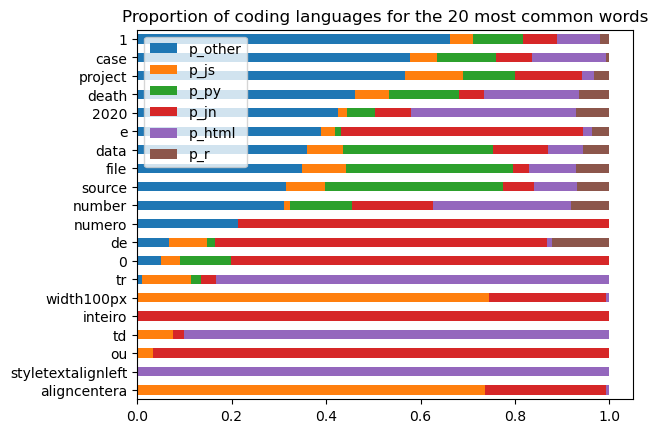

In [29]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_other=word_counts.other / word_counts['all'],
         p_js=word_counts.js / word_counts['all'],
         p_py=word_counts.py / word_counts['all'],
         p_jn=word_counts.jn / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_r=word_counts.r / word_counts['all'])
 .sort_values(by='all')
 [['p_other', 'p_js', 'p_py', 'p_jn', 'p_html', 'p_r']]
 .tail(20)
 .sort_values('p_other')
 .plot.barh(stacked=True))

plt.title('Proportion of coding languages for the 20 most common words')


In [108]:
def explore_plots(train):
    '''
    This function plots the necessary plots to visualize in exploration
    '''
    word_counts=words(train)
    
    other_pop=word_counts.sort_values(by='other', ascending=False).head(10)
    js_pop=word_counts.sort_values(by='js', ascending=False).head(10)
    py_pop=word_counts.sort_values(by='py', ascending=False).head(10)
    jn_pop=word_counts.sort_values(by='jn', ascending=False).head(10)
    html_pop=word_counts.sort_values(by='html', ascending=False).head(10)
    r_pop=word_counts.sort_values(by='r', ascending=False).head(10)
    
    plt.figure(figsize=(15,5))
    plt.subplot(321)
    plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
    plt.title('Common Words for "Other"')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    

    plt.subplot(322)
    plt.bar(height=js_pop['js'],x=js_pop.index,label='JavaScript', color='rebeccapurple')
    plt.title('Common Words for JavaScript')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(323)
    plt.bar(height=py_pop['py'],x=js_pop.index,label='Python', color='seagreen')
    plt.title('Common Words for Python')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(324)
    plt.bar(height=jn_pop['jn'],x=js_pop.index,label='Jupyter Notebook', color='peru')
    plt.title('Common Words for Jupyter Notebook')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(325)
    plt.bar(height=html_pop['html'],x=js_pop.index,label='HTML', color='darkkhaki')
    plt.title('Common Words for HTML')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    plt.subplot(326)
    plt.bar(height=r_pop['r'],x=js_pop.index,label='R', color= 'darkred')
    plt.title('Common Words for R')
    plt.xlabel('Words')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.xticks(rotation=30)
    plt.legend()
    
    
    
    
    
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=2,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

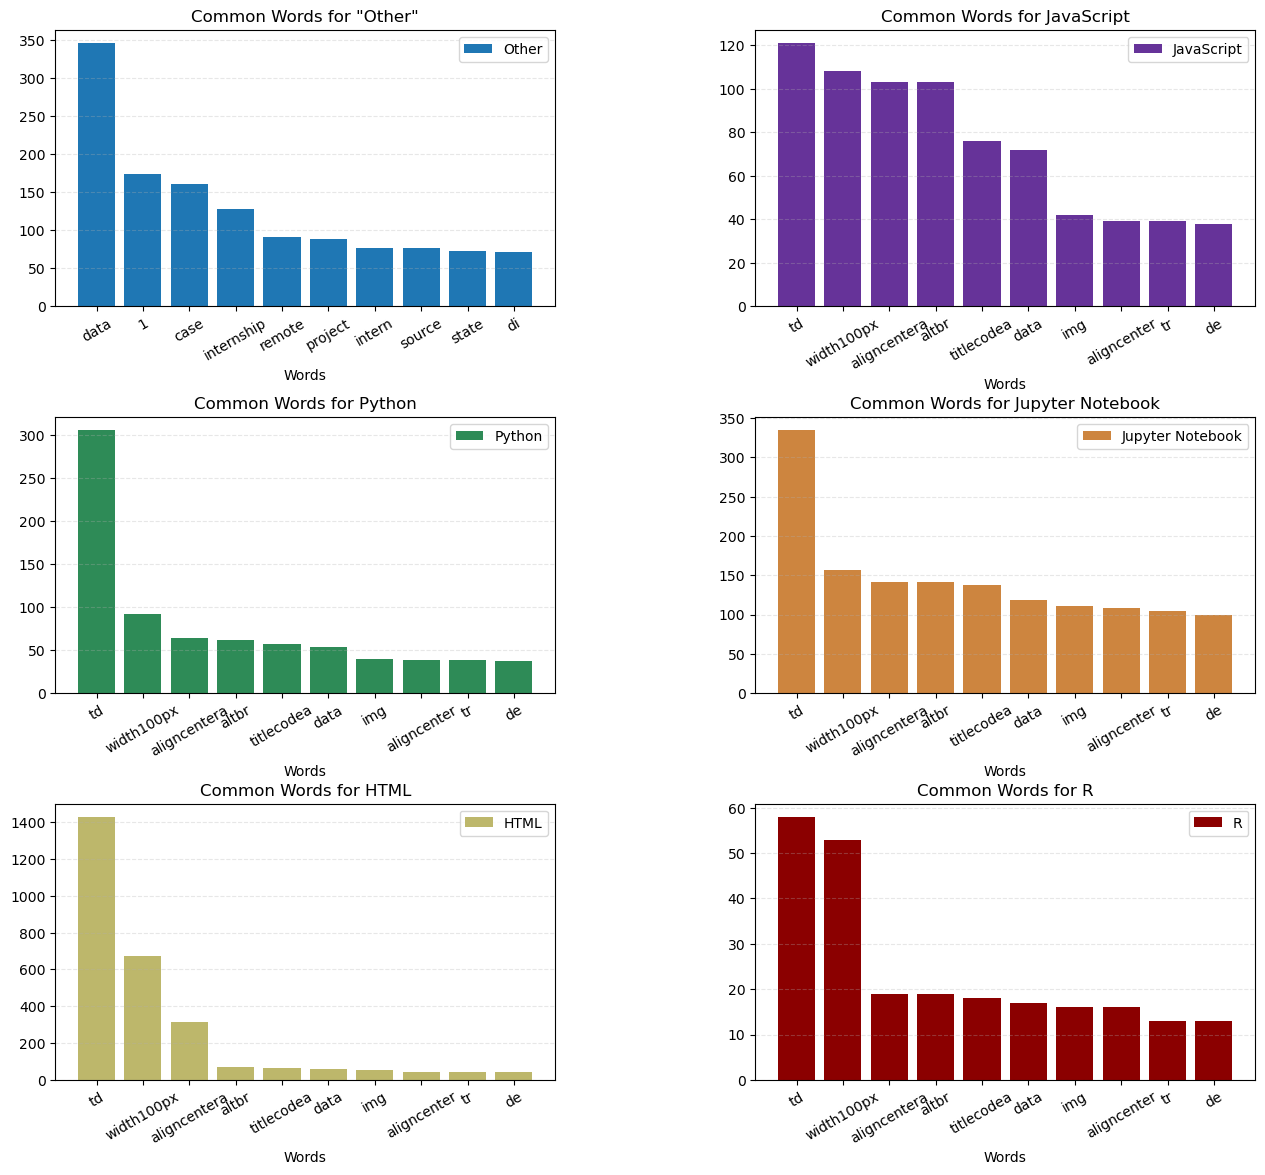

In [109]:
explore_plots(train)

In [32]:
other_pop=word_counts.sort_values(by='other', ascending=False).head(10)
js_pop=word_counts.sort_values(by='js', ascending=False).head(10)
py_pop=word_counts.sort_values(by='py', ascending=False).head(10)
jn_pop=word_counts.sort_values(by='jn', ascending=False).head(10)
html_pop=word_counts.sort_values(by='html', ascending=False).head(10)
r_pop=word_counts.sort_values(by='r', ascending=False).head(10)

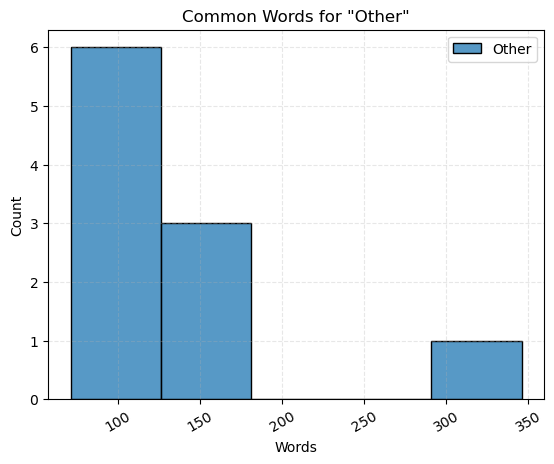

In [33]:
sns.histplot(x='other', data=other_pop,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
plt.show()

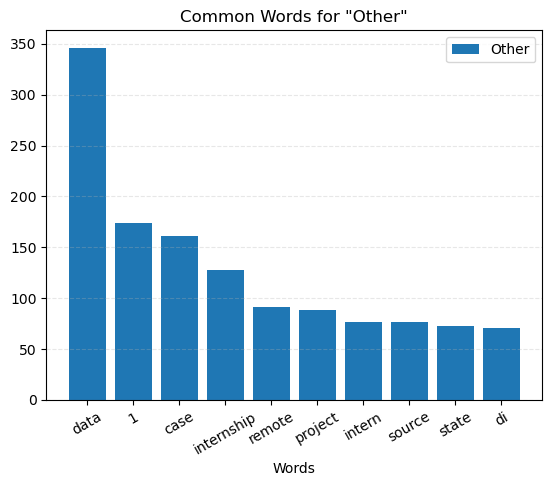

In [34]:
plt.subplot(111)
plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [35]:
other_pop

,all,other,js,py,jn,html,r
data,960,346,72,306,111,72,53
1,263,174,13,28,19,24,5
case,279,161,16,35,21,44,2
internship,128,128,0,0,0,0,0
remote,93,91,2,0,0,0,0
project,155,88,19,17,22,4,5
intern,77,77,0,0,0,0,0
source,244,77,20,92,16,22,17
state,134,73,12,38,2,8,1
di,73,71,0,0,0,0,2


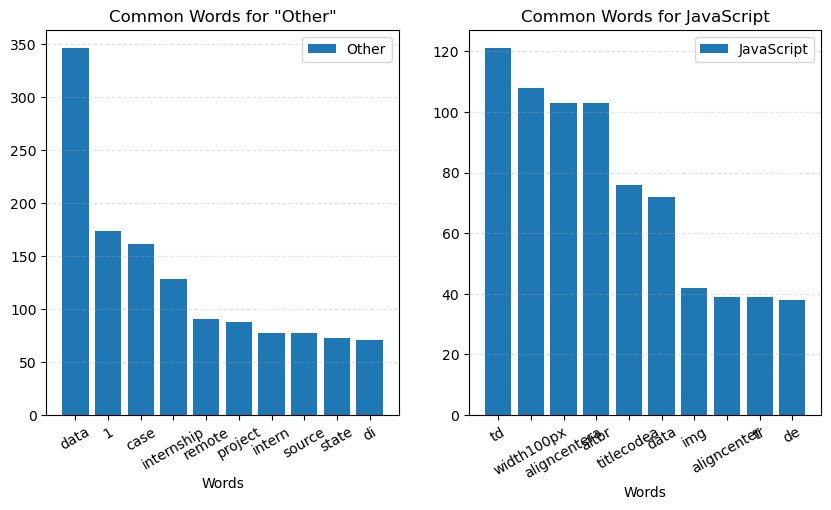

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(height=other_pop['other'],x=other_pop.index,label='Other')
plt.title('Common Words for "Other"')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()


plt.subplot(122)
plt.bar(height=js_pop['js'],x=js_pop.index,label='JavaScript')
plt.title('Common Words for JavaScript')
plt.xlabel('Words')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=30)
plt.legend()
